## Trabalho Prático - Módulo 1

In [1]:
# importando as bibliotecas
import pandas as pd # biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np # biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt # biblioteca utilizada para construir os gráficos

In [2]:
# realizando a leitura do arquivo (dataset)
df_envio_portos = pd.read_csv('data.csv')

In [3]:
# apresentando as 5 primeiras linhas do dataset
df_envio_portos.head()

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
0,True,cigar,111,222,India,129,3784.402551,sea,asia,04/25/2019,05/13/2019,1608.605135,1637.661221,18.232857
1,True,cigar,111,222,India,104,3081.350806,sea,america,04/22/2019,05/24/2019,831.719301,848.273419,32.436029
2,True,cigar,111,222,India,130,4414.125741,sea,europe,04/29/2019,05/16/2019,1527.704165,1582.063911,16.996206
3,True,cigar,111,222,India,143,2533.535991,sea,panama,05/05/2019,05/25/2019,1138.680563,1179.993817,19.965886
4,True,cigar,111,222,China,141,4396.397887,sea,asia,05/14/2019,06/05/2019,761.744581,781.735080,22.160034


#### Quantas instâncias e atributos existem no dataset?

In [4]:
df_envio_portos.shape # verificando as dimensões do dataset

(120, 14)

#### Quantos tipos diferentes de dados existem no dataset?

In [5]:
df_envio_portos.info() # verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valid_import       120 non-null    bool   
 1   item               120 non-null    object 
 2   importer_id        120 non-null    int64  
 3   exporter_id        120 non-null    int64  
 4   country_of_origin  120 non-null    object 
 5   declared_quantity  120 non-null    int64  
 6   declared_cost      120 non-null    float64
 7   mode_of_transport  120 non-null    object 
 8   route              120 non-null    object 
 9   date_of_departure  120 non-null    object 
 10  date_of_arrival    120 non-null    object 
 11  declared_weight    120 non-null    float64
 12  actual_weight      120 non-null    float64
 13  days_in_transit    120 non-null    float64
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 12.4+ KB


In [6]:
df_envio_portos.dtypes.value_counts()

object     6
float64    4
int64      3
bool       1
dtype: int64

In [7]:
df_envio_portos.dtypes.nunique()

4

In [8]:
df_envio_portos.isnull().sum()

valid_import         0
item                 0
importer_id          0
exporter_id          0
country_of_origin    0
declared_quantity    0
declared_cost        0
mode_of_transport    0
route                0
date_of_departure    0
date_of_arrival      0
declared_weight      0
actual_weight        0
days_in_transit      0
dtype: int64

#### Qual é o valor médio para a variável "declared_quantity"?
#### Qual é o valor do desvio padrão para a variável "declared_weight"?

In [9]:
# analisando a "estatística" do dataset
df_envio_portos.describe()

,importer_id,exporter_id,declared_quantity,declared_cost,declared_weight,actual_weight,days_in_transit
count,120.0,120.0,120.000000,120.000000,120.000000,120.000000,120.000000
mean,111.0,222.0,127.458333,6743.649881,1264.702934,1306.429806,35.424705
std,0.0,0.0,14.641311,2991.797050,633.149971,656.911704,26.571591
min,111.0,222.0,100.000000,1441.012419,18.459509,19.275241,12.410325
25%,111.0,222.0,115.750000,4442.903914,820.314400,841.763738,18.225625
50%,111.0,222.0,131.500000,6010.218745,1255.597743,1305.716419,27.044293
75%,111.0,222.0,139.000000,8887.095370,1711.314045,1763.681083,44.356374
max,111.0,222.0,149.000000,14281.325362,2806.338955,2918.681683,147.787560


In [10]:
df_envio_portos['declared_quantity'].mean()

127.45833333333333

In [11]:
df_envio_portos['declared_weight'].std()

633.149970913157

#### Existem possíveis outliers?

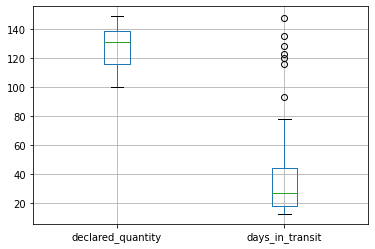

In [12]:
# identificando possíveis outliers
df_envio_portos[['declared_quantity','days_in_transit']].boxplot()

In [13]:
# z-score
from scipy import stats
z = np.abs(stats.zscore(df_envio_portos['days_in_transit'].values))
threshold = 3
result = np.where(z > threshold)

df_envio_portos_outlier = df_envio_portos.iloc[result[0]]
df_envio_portos_outlier

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
61,False,cigar,111,222,India,131,1594.074225,sea,america,05/08/2019,09/01/2019,1489.554025,1551.161701,116.140911
73,False,cigar,111,222,France,110,8953.524711,sea,america,05/16/2019,09/13/2019,193.130429,200.966710,120.406246
81,False,cigar,111,222,India,134,3326.973672,sea,america,05/12/2019,10/07/2019,280.984620,289.694339,147.787560
85,False,cigar,111,222,China,113,5745.640896,sea,america,04/22/2019,08/28/2019,627.941986,655.845304,128.416712
97,False,cigar,111,222,Italy,144,10849.145863,sea,america,05/09/2019,09/09/2019,291.849891,303.328673,123.277846
105,False,cigar,111,222,China,139,4174.018265,sea,america,05/12/2019,09/25/2019,231.583758,243.047276,135.627561


#### Realizando a análise de regressão

In [14]:
x = df_envio_portos['declared_weight'].values  # variável independente, preditora
Y = df_envio_portos['actual_weight'].values # variável dependente

In [15]:
# importa o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression

In [16]:
# realiza a construção do modelo de regressão
reg = LinearRegression()
x_Reshaped = x.reshape((-1, 1)) # coloca os dados no formato 2D
regressao = reg.fit(x_Reshaped, Y) # encontra os coeficientes (realiza a regressão)

In [17]:
# realiza a previsão
previsao = reg.predict(x_Reshaped)

In [18]:
# análise do modelo
from sklearn.metrics import r2_score # método para o cálculo do R2 (coeficiente de determinação)

In [19]:
# parâmetros encontrados
print('Y = {} \nX = {}'.format(reg.coef_, reg.intercept_)) # coeficiente angular da reta, coeficiente linear da reta

R_2 = r2_score(Y, previsao)  # realiza o cálculo do R2, métrica para avaliar o modelo de regressão
print("\nCoeficiente de Determinação (R2):", R_2)

Y = [1.03718115] 
X = -5.296233030439225

Coeficiente de Determinação (R2): 0.9993288165644932


#### Pelo Coefiente de Determinação, o que é possível afirmar sobre a relação entre as variáveis Peso Real x Peso Declarado?

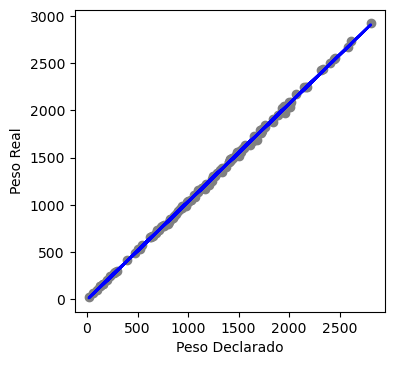

In [20]:
# realiza o plot dos dados
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(x, Y, color = 'gray') # realiza o plot do gráfico de dispersão
plt.plot(x, previsao, color = 'blue', linewidth = 2) # realiza o plot da "linha"
plt.xlabel("Peso Declarado")
plt.ylabel("Peso Real")
plt.show()